In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib
%matplotlib inline 
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sb
%load_ext autoreload
import math

In [2]:
%autoreload

In [3]:
dwayne_file = "ScarletteJoActors.graphml"

In [4]:
dwayne = nx.read_graphml(dwayne_file)
dwayneDict = dwayne.nodes(data=True)

In [5]:
dwayne_deg = dict(nx.degree(dwayne, weight="weight"))
dwayne_bet = dict(nx.betweenness_centrality(dwayne, weight="weight"))
dwayne_clo = dict(nx.closeness_centrality(dwayne))

In [7]:
names = {actor:data['label'] for actor, data in dwayneDict}
gender ={actor:data['gender'] for actor, data in dwayneDict}

In [8]:
dwayne_df = pd.DataFrame({"Wt Degree": dwayne_deg, "bet":dwayne_bet, "clo":dwayne_clo, "Names": names, "Sex": gender})
dwayne_df = dwayne_df.set_index("Names")
dwayne_df.head()

,Wt Degree,bet,clo,Sex
Names,,,,
<Scarlett_Johansson>,56,0.047083,0.348363,male
<Sam_Neill>,76,0.074588,0.297706,male
<Robert_Redford>,24,0.021763,0.243527,male
<Kristin_Scott_Thomas>,25,0.021838,0.287295,female
<Chris_Evans_(actor)>,60,0.018414,0.318762,male


In [9]:
dw_bool = dwayne_df['Sex'] == 'male' 
dw_filter = dwayne_df['bet'] != 0

#dw_bool
#dw_filter
nonZeroBet = dwayne_df['bet'][dw_filter]
nonZeroClo = dwayne_df['clo'][dw_filter]
#nonZeroBet[~dw_bool]

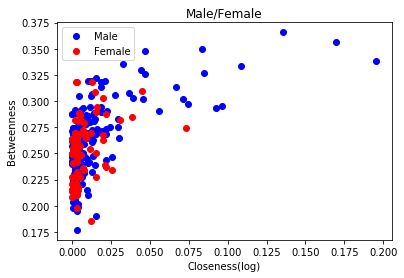

In [28]:
nonZeroBet = dwayne_df['bet'][dw_filter]

dwayne_betm = nonZeroBet[dw_bool]
dwayne_clom = nonZeroClo[dw_bool]
plt.plot( dwayne_betm, dwayne_clom, 'ob')

dwayne_betf = nonZeroBet[~dw_bool]
dwayne_clof = nonZeroClo[~dw_bool]
plt.plot( dwayne_betf, dwayne_clof,  'or')
#dwayne_clo = dwayne_df['clo']




#ga_age_mon = dwayne_df['age'][~dwayne_df['mon']]
#ga_clo_mon = dwayne_df['clo'][~dwayne_df['mon']]


#plt.plot( ga_age_mon, ga_clo_mon , 'or')

plt.title('Male/Female')
plt.ylabel('Betweenness')
plt.xlabel('Closeness(log)')
plt.legend(['Male', 'Female'])

In [25]:
type(dwayne_df['Sex'])
males = dwayne_df['Sex'][dw_bool]
len(males)
females = dwayne_df['Sex'][~dw_bool]
len(females)

219

Text(0.5,1,'Closeness in Males vs Females in SJO graph')

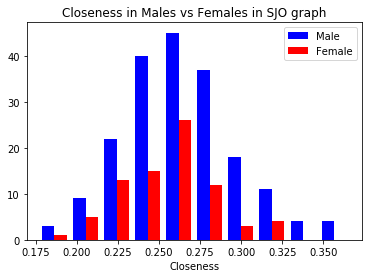

In [102]:

plt.hist([dwayne_clom, dwayne_clof]  , color = ['b', 'r'])
#plt.hist(dwayne_betm , bins , alpha = 0.5, color = 'b')
#plt.hist(dwayne_betf , bins,  alpha = 0.5, color = 'r')
plt.xlabel("Closeness")
plt.legend(["Male","Female"])
plt.title("Closeness in Males vs Females in SJO graph")

([array([ 0.,  0.,  9., 11., 38., 82., 67., 31.,  0.]),
  array([ 0.,  0.,  4.,  9., 19., 50., 37., 15.,  6.])],
 array([0.1       , 0.12222222, 0.14444444, 0.16666667, 0.18888889,
        0.21111111, 0.23333333, 0.25555556, 0.27777778, 0.3       ]),
 <a list of 2 Lists of Patches objects>)

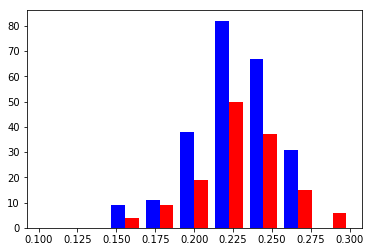

In [79]:
onlyZeroClo = dwayne_df['clo'][~dw_filter]

femaleClo = onlyZeroClo[dw_bool]
maleClo = onlyZeroClo[~dw_bool]
bins = np.linspace(0.1, 0.3, 10)
plt.hist([femaleClo, maleClo] , bins , color = ['b', 'r'])
#plt.hist(maleClo , bins,  alpha = 0.5, color = 'r')

([array([  9.,  21.,  47., 103., 116.,  82.,  26.,  17.,   6.,   4.]),
  array([ 4., 14., 28., 59., 56., 36., 16.,  6.,  0.,  0.])],
 array([0.15040556, 0.171949  , 0.19349243, 0.21503587, 0.2365793 ,
        0.25812274, 0.27966617, 0.30120961, 0.32275304, 0.34429648,
        0.36583991]),
 <a list of 2 Lists of Patches objects>)

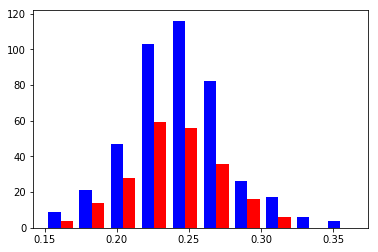

In [91]:

maleClo = dwayne_df['clo'][dw_bool]
femaleClo = dwayne_df['clo'][~dw_bool]
plt.hist([maleClo, femaleClo] , color = ['b', 'r'])

Text(0.5,1,'Male/Female Weighted Degree')

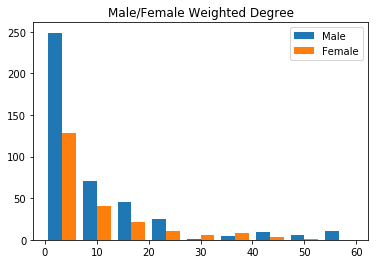

In [101]:
bins = np.linspace(0, 60,10)
plt.hist([dwayne_df['Wt Degree'][dw_bool], dwayne_df['Wt Degree'][~dw_bool]], bins)
plt.legend(["Male", "Female"])
plt.title("Male/Female Weighted Degree")
#plt.axes(y = 'log')

Text(0.5,1,'Betweenness in Males vs Females in SJO graph')

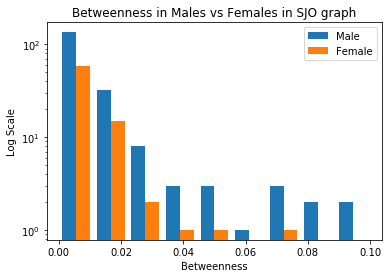

In [112]:
bins = np.linspace(0.0, 0.1, 10)
plt.hist([dwayne_betm, dwayne_betf] ,bins , )
plt.xlabel("Betweenness")
plt.ylabel("Log Scale")
plt.yscale("log")
plt.legend(["Male","Female"])
plt.title("Betweenness in Males vs Females in SJO graph")